In [ ]:


import pandas as pd
import numpy as np
import missingno as msn
import matplotlib.pyplot as plt
import seaborn as sns
from warnings import filterwarnings as fw
fw("ignore")

In [ ]:
#reading files

In [ ]:
noc = pd.read_csv('/content/noc_regions.csv')


In [ ]:
oly = pd.read_csv('/content/athlete_events.csv')

In [ ]:
oly.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In [ ]:
noc.head()

,NOC,region,notes
0,AFG,Afghanistan,NaN
1,AHO,Curacao,Netherlands Antilles
2,ALB,Albania,NaN
3,ALG,Algeria,NaN
4,AND,Andorra,NaN


In [ ]:
df=oly.merge(noc,on='NOC',how='left')

In [ ]:
df.head(10)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,China,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN,Denmark,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark,NaN
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN,Netherlands,NaN
5,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,"Speed Skating Women's 1,000 metres",NaN,Netherlands,NaN
6,5,Christine Jacoba Aaftink,F,25.0,185.0,82.0,Netherlands,NED,1992 Winter,1992,Winter,Albertville,Speed Skating,Speed Skating Women's 500 metres,NaN,Netherlands,NaN
7,5,Christine Jacoba Aaftink,F,25.0,185.0,82.0,Netherlands,NED,1992 Winter,1992,Winter,Albertville,Speed Skating,"Speed Skating Women's 1,000 metres",NaN,Netherlands,NaN
8,5,Christine Jacoba Aaftink,F,27.0,185.0,82.0,Netherlands,NED,1994 Winter,1994,Winter,Lillehammer,Speed Skating,Speed Skating Women's 500 metres,NaN,Netherlands,NaN
9,5,Christine Jacoba Aaftink,F,27.0,185.0,82.0,Netherlands,NED,1994 Winter,1994,Winter,Lillehammer,Speed Skating,"Speed Skating Women's 1,000 metres",NaN,Netherlands,NaN


In [ ]:
df.groupby('region')['Medal'].count().nlargest(20).reset_index()

,region,Medal
0,USA,3110
1,Germany,2010
2,Russia,1919
3,UK,1137
4,France,1135
5,Sweden,901
6,Italy,836
7,Canada,734
8,Australia,718
9,Hungary,631


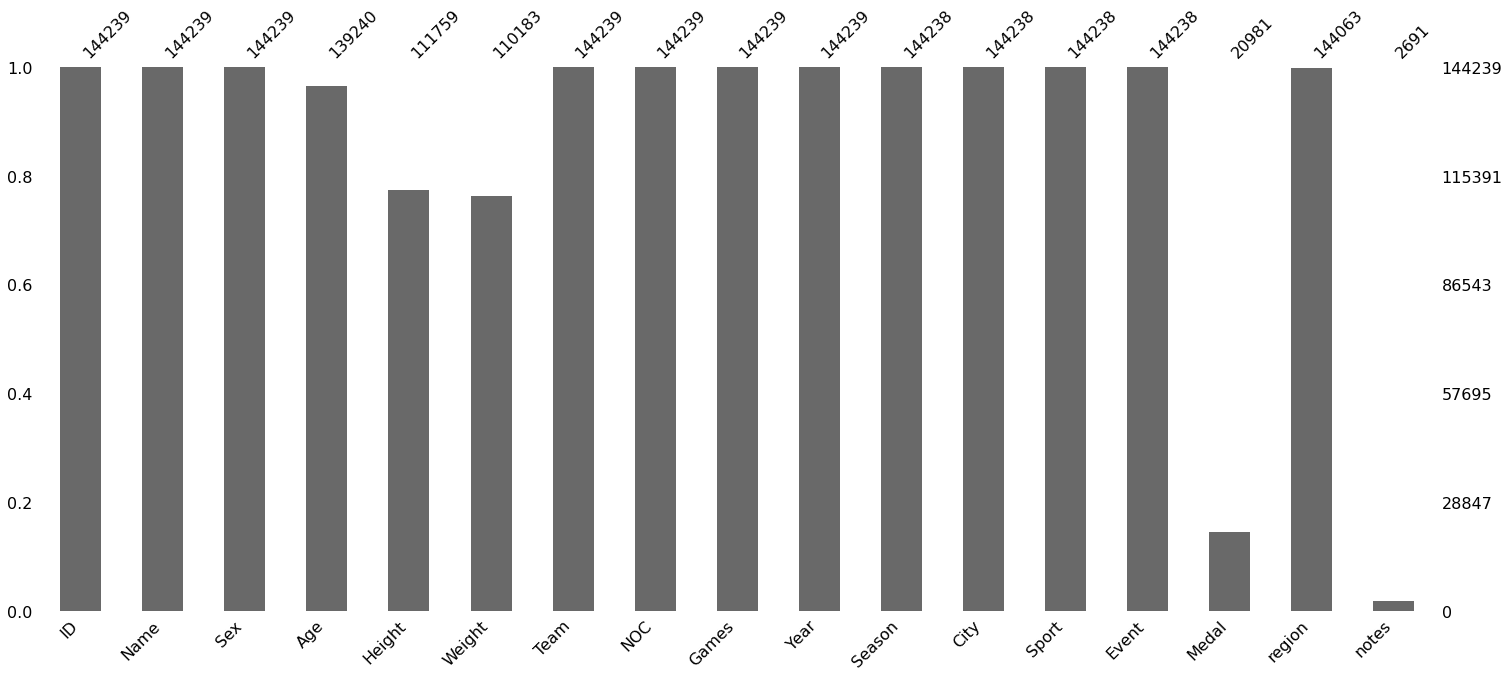

In [ ]:
msn.bar(df)
plt.show()

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,144239.0,36637.809171,20829.121860,1.0,18522.5,36696.0,54681.0,72387.0
Age,139240.0,25.542782,6.369399,10.0,21.0,24.0,28.0,96.0
Height,111759.0,175.428520,10.427139,127.0,168.0,175.0,183.0,223.0
Weight,110183.0,70.790235,14.228277,25.0,61.0,70.0,79.0,214.0
Year,144239.0,1978.114407,29.973944,1896.0,1960.0,1988.0,2002.0,2016.0


In [ ]:
df.isnull().sum()/df.shape[0]

ID        0.000000
Name      0.000000
Sex       0.000000
Age       0.034658
Height    0.225182
Weight    0.236108
Team      0.000000
NOC       0.000000
Games     0.000000
Year      0.000000
Season    0.000007
City      0.000007
Sport     0.000007
Event     0.000007
Medal     0.854540
region    0.001220
notes     0.981343
dtype: float64

In [ ]:
df.drop('notes',axis=1,inplace=True)

In [ ]:
df.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,China
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN,Denmark
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN,Netherlands


In [ ]:
region_medal=df.groupby('region')['Medal'].count().nlargest(20).reset_index()

In [ ]:
region_medal.head()

,region,Medal
0,USA,3110
1,Germany,2010
2,Russia,1919
3,UK,1137
4,France,1135


In [ ]:
#medals by region barh

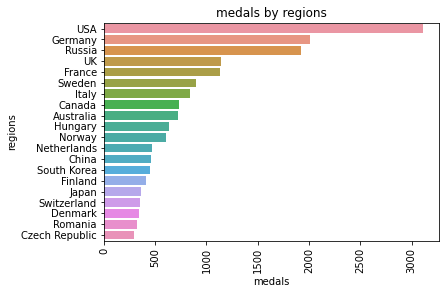

In [ ]:
sns.barplot(y='region',x='Medal',data=region_medal)
plt.title('medals by regions')
plt.xlabel('medals')
plt.ylabel('regions')
plt.xticks(rotation=90)
plt.show()

In [ ]:
df['Medal'].value_counts()

Gold      7057
Bronze    6987
Silver    6937
Name: Medal, dtype: int64

In [ ]:
df[df['Medal']=='Gold'][['Name','region']]

,Name,region
3,Edgar Lindenau Aabye,Denmark
42,Paavo Johannes Aaltonen,Finland
44,Paavo Johannes Aaltonen,Finland
48,Paavo Johannes Aaltonen,Finland
60,Kjetil Andr Aamodt,Norway
...,...,...
144174,"Johan August ""ge"" Lundstrm",Sweden
144176,"Johan August ""ge"" Lundstrm",Sweden
144182,Klas Julius Lundstrm,Sweden
144184,Bo Hilding Martin Lundstrm,Sweden


In [ ]:
#creating indexes

In [ ]:
season=df.groupby(['Year','Season','City'],as_index='False').first()

In [ ]:
season

ID                                Name  \
Year Season City                                                               
1896 Summer Athina                  1724              Aristidis Akratopoulos   
1900 Summer Paris                      4                Edgar Lindenau Aabye   
1904 Summer St. Louis                404         Louis Grenville "Lou" Abell   
1906 Summer Athina                   139              George "Ioannis" Abbot   
1908 Summer London                   635                     Alfredo Accorsi   
1912 Summer Stockholm                 15                Arvo Ossian Aaltonen   
1920 Summer Antwerpen                  3                 Gunnar Nielsen Aaby   
1924 Summer Paris                     15                Arvo Ossian Aaltonen   
     Winter Chamonix                 391                  Clarence John Abel   
1928 Summer Amsterdam                 47                Erling Rudolf Aastad   
     Winter Sankt Moritz             529     Karl Gustaf Emanuel Abrahamsson   
1932 Summer Los Angeles                8  Cornelia "Cor" Aalten (-Strannood)   
     Winter Lake Placid              746                         Goro Adachi   
1936 Summer Berlin                    31                   Evald rma (rman-)   
     Winter Garmisch-Partenkirchen   746                         Goro Adachi   
1948 Summer London                    17             Paavo Johannes Aaltonen   
     Winter Sankt Moritz             665               Gilbert Achard-Picard   
1952 Summer Helsinki                  10      Einar Ferdinand "Einari" Aalto   
     Winter Oslo                      40                     Roald Edgar Aas   
1956 Summer Melbourne                 46                          Hans Aasns   
            Stockholm               3479     Karl Vilhelm Nordstrm Ammitzbll   
     Winter Cortina d'Ampezzo         40                     Roald Edgar Aas   
1960 Summer Roma                      46                          Hans Aasns   
     Winter Squaw Valley              24                    Nils Egil Aaness   
1964 Summer Tokyo                     87        Rost'om Omeris dze Abashidze   
     Winter Innsbruck                 24                    Nils Egil Aaness   
1968 Summer Mexico City               28                    Jan-Erik Aarberg   
     Winter Grenoble                 137           Giordano Giulio Abbondati   
1972 Summer Munich                    28                    Jan-Erik Aarberg   
     Winter Sapporo                  363                          Kazumi Abe   
1976 Summer Montreal                  52                       Patrick Abada   
     Winter Innsbruck                363                          Kazumi Abe   
1980 Summer Moskva                    85             Alejandro Abascal Garca   
     Winter Lake Placid               11                  Jorma Ilmari Aalto   
1984 Summer Los Angeles               27                       Johan Aantjes   
     Winter Sarajevo                  26        Agnes Erika Aanonsen (-Eyde)   
1988 Summer Seoul                     29                Willemien Aardenburg   
     Winter Calgary                    5            Christine Jacoba Aaftink   
1992 Summer Barcelona                  1                           A Dijiang   
     Winter Albertville                5            Christine Jacoba Aaftink   
1994 Winter Lillehammer                5            Christine Jacoba Aaftink   
1996 Summer Atlanta                   13                  Minna Maarit Aalto   
1998 Winter Nagano                    20                  Kjetil Andr Aamodt   
2000 Summer Sydney                    12                   Jyri Tapani Aalto   
2002 Winter Salt Lake City             9                    Antti Sami Aalto   
2004 Summer Athina                    23                         Fritz Aanes   
2006 Winter Torino                    20                  Kjetil Andr Aamodt   
2008 Summer Beijing                   21           Ragnhild Margrethe Aamodt   
2010 Winter Vancouver                1

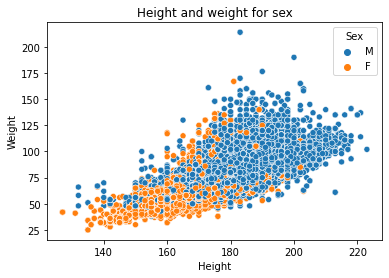

In [ ]:
sns.scatterplot(x='Height',y='Weight',hue='Sex',data=df)
plt.title('Height and weight for sex')
plt.show()
#scatter plot of height and weight based on sex

In [ ]:
#grouping and plotting women's olympics 

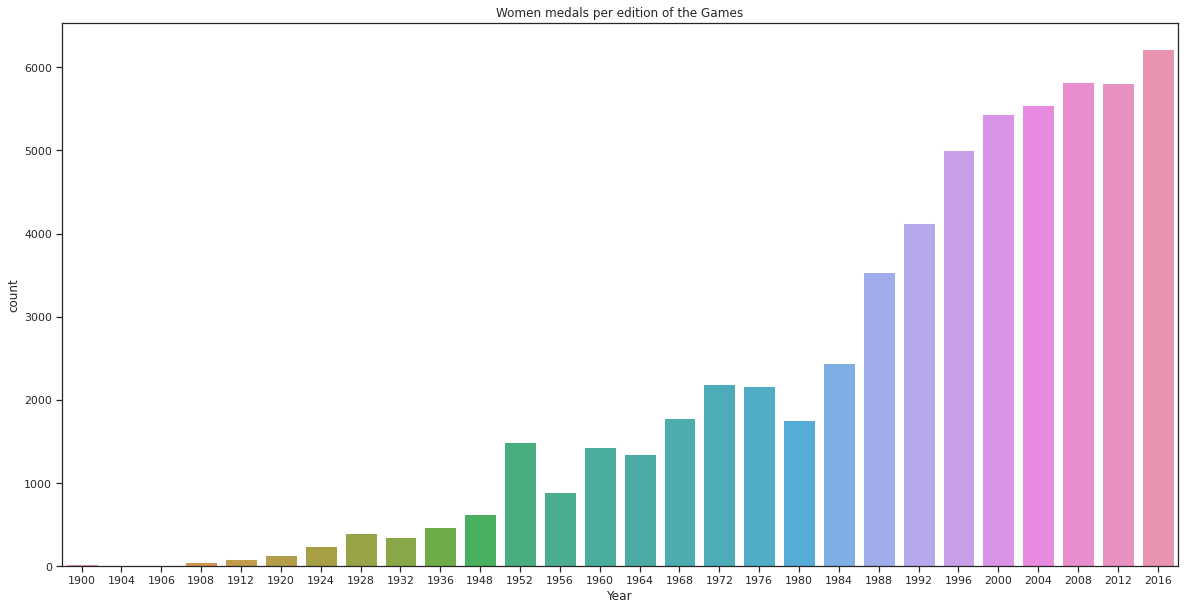

In [ ]:
womenolympics = df[(df.Sex == 'F') &
                         (df.Season == 'Summer')]
plt.figure(figsize=(20, 10))
sns.countplot(x='Year', data=womenolympics)
plt.title('Women medals per edition of the Games')
plt.show()

In [ ]:
sport=df['Sport'].value_counts()[:5]
print(sport)

Athletics     20666
Gymnastics    14024
Swimming      12252
Shooting       6100
Fencing        5885
Name: Sport, dtype: int64


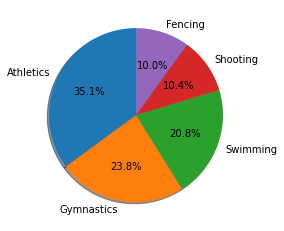

In [ ]:
labels=sport.index
sizes=sport.values
plt.pie(sizes,labels=labels,autopct='%1.1f%%',
        shadow=True,startangle=90)
plt.show()
#pie visualization for sports

In [ ]:
sport_summer=df[df['Season']=='Summer']['Sport'].value_counts().sort_values(ascending=False).head(20)

In [ ]:
sport_summer.head()

Athletics     20666
Gymnastics    14024
Swimming      12252
Shooting       6100
Fencing        5885
Name: Sport, dtype: int64

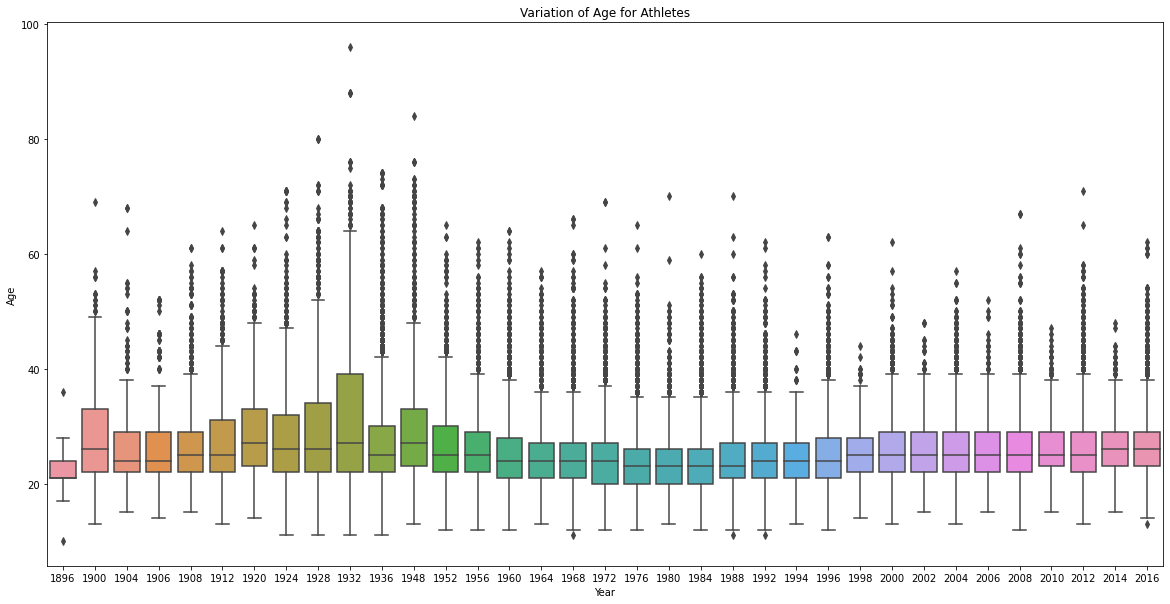

In [ ]:
plt.figure(figsize=(20,10))
sns.boxplot(x='Year', y='Age', data=df)
plt.title('Variation of Age for Athletes')
plt.show()

In [ ]:
df1=pd.read_csv('/content/noc_regions.csv')
df1.rename(
    columns=({'region': 'Region'}),
    inplace = True,
)
df1.head()

,NOC,Region,notes
0,AFG,Afghanistan,NaN
1,AHO,Curacao,Netherlands Antilles
2,ALB,Albania,NaN
3,ALG,Algeria,NaN
4,AND,Andorra,NaN


In [ ]:
#kmeans clustering

#clustering based on height and weight of players clustered by winners and non winners

In [ ]:
from sklearn.cluster import KMeans
import statsmodels.api as sm

In [ ]:
AgeMean = int(df['Age'].mean())
print('Age Mean', AgeMean)
df['Age'] = df['Age'].fillna(AgeMean)
df['Age'].isna().sum()

Age Mean 25


0

In [ ]:
HeightMode = df['Height'].mode()[0] ## 0 -> the column wise mode 
print('Height Mode',HeightMode)
df['Height'] = df['Height'].fillna(HeightMode)
df['Height'].isna().sum()

Height Mode 180.0


0

In [ ]:
WeightMode = df['Weight'].mode()[0]
print('Weight Mode',WeightMode)
df['Weight'] = df['Weight'].fillna(WeightMode)
df['Weight'].isna().sum()

Weight Mode 70.0


0

In [ ]:
##The Medal column has NaN values if no medal is won , we Substitute the NaN values with a string 'None'

df['Medal'] = df['Medal'].fillna('None')
df['Medal'].isna().sum()

0

In [ ]:
df['HeightNorm'] = (df['Height']-df['Height'].mean())/np.std(df['Height'],axis = 0)
df['WeightNorm'] = (df['Weight']-df['Weight'].mean())/np.std(df['Weight'],axis = 0)

In [ ]:
## Input for K Means Algo
### Creating dataset for the winners alone
med = ['Gold','Silver','Bronze']
Height_Weight_Win = df[df.Medal.isin(med)]
Height_Weight_Win = Height_Weight_Win[['HeightNorm','WeightNorm']]

### Creating dataset for all the players based on height and weight norms
Height_Weight= df[['HeightNorm','WeightNorm']]

Height_Weight.head()

,HeightNorm,WeightNorm
0,0.486868,0.723780
1,-0.581317,-0.855145
2,0.403550,0.241418
3,-0.007702,-0.008842
4,1.020961,0.881672


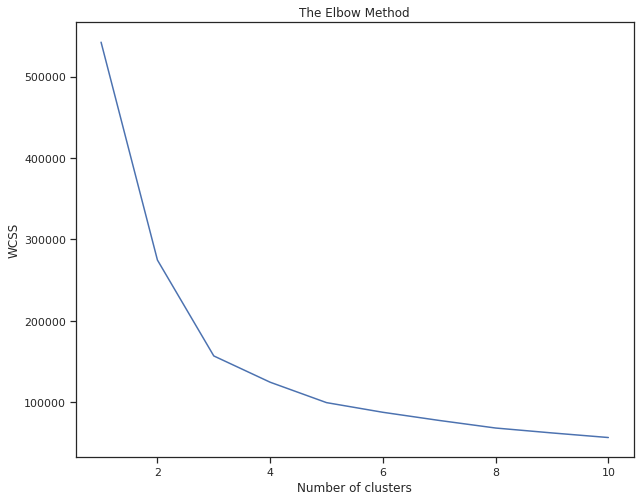

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

In [ ]:
# finding the appropriate cluster number
plt.figure(figsize=(10, 8))
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(Height_Weight)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()
plt.figure(figsize=(10, 8))

In [ ]:
# Fitting K-Means to the dataset taking cluster value 3
from mpl_toolkits.mplot3d import Axes3D

kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_

centroids = kmeans.cluster_centers_

In [ ]:
#beginning of  the cluster numbering with 1 instead of 0
y_kmeans1=y_kmeans
y_kmeans1=y_kmeans+1
# New Dataframe called cluster
cluster = pd.DataFrame(y_kmeans1)
# Adding cluster to the Dataset1
Height_Weight['cluster'] = cluster

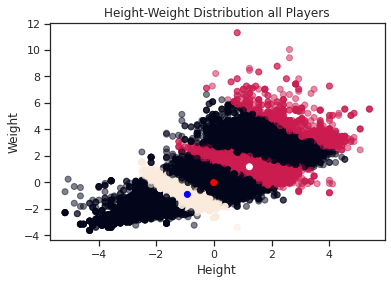

In [ ]:
#Plotting Mean of clusters based on height and weight distribution of players
kmeans_mean_cluster = pd.DataFrame(round(Height_Weight.groupby('cluster').mean(),1))
kmeans_mean_cluster

plt.title('Height-Weight Distribution all Players')
plt.xlabel('Height')
plt.ylabel('Weight')
plt.scatter(Height_Weight['HeightNorm'], Height_Weight['WeightNorm'], c= kmeans.labels_.astype(float), alpha=0.5)
plt.scatter(centroids[:, 0], centroids[:, 1], c=['red','white','blue'])


plt.show()

In [ ]:
#participants winning medals

Height_Weight_Win = Height_Weight_Win[['HeightNorm','WeightNorm']]

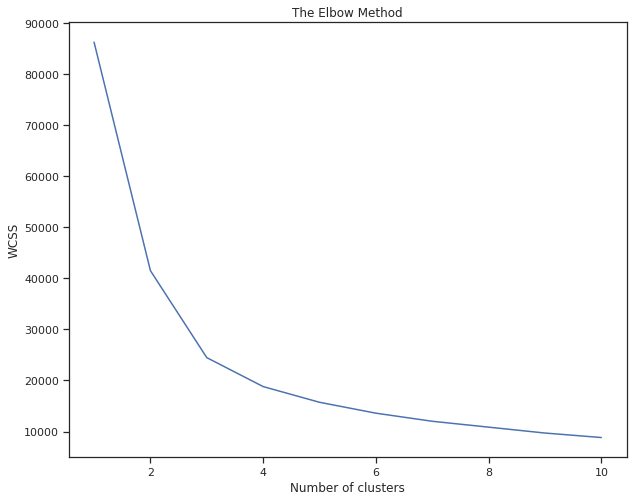

In [ ]:
# find the appropriate cluster number
plt.figure(figsize=(10, 8))
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(Height_Weight_Win)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()


In [ ]:
# Fitting K-Means to the dataset
from mpl_toolkits.mplot3d import Axes3D
plt.figure(figsize=(10, 8))

kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(Height_Weight_Win)

centroids = kmeans.cluster_centers_

<Figure size 720x576 with 0 Axes>

In [ ]:
#beginning of  the cluster numbering with 1 instead of 0
y_kmeans1=y_kmeans
y_kmeans1=y_kmeans+1
# New Dataframe called cluster
cluster = pd.DataFrame(y_kmeans1)

In [ ]:
# Adding cluster to the Dataset1
Height_Weight_Win['cluster'] = cluster

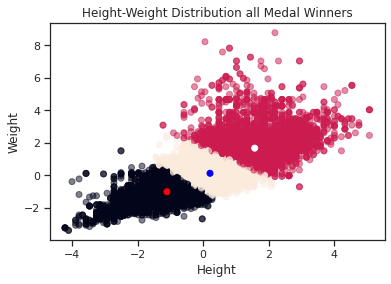

In [ ]:
#Mean of clusters
kmeans_mean_cluster = pd.DataFrame(round(Height_Weight_Win.groupby('cluster').mean(),1))
kmeans_mean_cluster

plt.title('Height-Weight Distribution all Medal Winners')
plt.xlabel('Height')
plt.ylabel('Weight')
plt.scatter(Height_Weight_Win['HeightNorm'], Height_Weight_Win['WeightNorm'], c= kmeans.labels_.astype(float), alpha=0.5)
plt.scatter(centroids[:, 0], centroids[:, 1], c=['red','white','blue'])
plt.show()

In [ ]:
#clustering based on height and weight of players clustered by winners and non winners
#Both of them follow a similar distribution, and hence the winners and non-winners do not show a huge difference in their height and weight. This shows that, taking the height and weight into considerence, all the players have almost equally likely chances to win a medal.

clustering based on height and weight of players clustered by winners and non winners
Both of them follow a similar distribution, and hence the winners and non-winners do not show a huge difference in their height and weight. This shows that, taking the height and weight into considerence, all the players have almost equally likely chances to win a medal.

Hierarchical ***Clustering***

In [ ]:
df

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,China,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN,Denmark,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark,NaN
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN,Netherlands,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
271111,135569,Andrzej ya,M,29.0,179.0,89.0,Poland-1,POL,1976 Winter,1976,Winter,Innsbruck,Luge,Luge Mixed (Men)'s Doubles,NaN,Poland,NaN
271112,135570,Piotr ya,M,27.0,176.0,59.0,Poland,POL,2014 Winter,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Individual",NaN,Poland,NaN
271113,135570,Piotr ya,M,27.0,176.0,59.0,Poland,POL,2014 Winter,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Team",NaN,Poland,NaN
271114,135571,Tomasz Ireneusz ya,M,30.0,185.0,96.0,Poland,POL,1998 Winter,1998,Winter,Nagano,Bobsleigh,Bobsleigh Men's Four,NaN,Poland,NaN


In [ ]:
df2=oly.sample(1000)

In [ ]:
x = df2.iloc[:, [0, 9]].values  

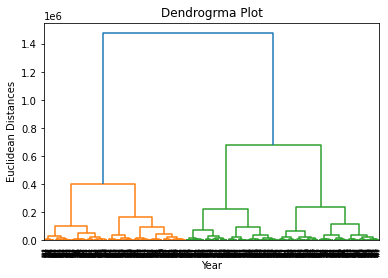

In [ ]:
#Finding the optimal number of clusters using the dendrogram  
import scipy.cluster.hierarchy as shc  
dendro = shc.dendrogram(shc.linkage(x, method="ward"))  
plt.title("Dendrogrma Plot")  
plt.ylabel("Euclidean Distances")  
plt.xlabel("Year")  
plt.show()  

In [ ]:
df2.dropna()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
178357,89658,"Daniel Patrick ""Danny"" O'Shea",M,22.0,185.0,86.0,Canada,CAN,1968 Winter,1968,Winter,Grenoble,Ice Hockey,Ice Hockey Men's Ice Hockey,Bronze
164333,82494,Rosa Mara Correia dos Santos Mota,F,30.0,157.0,45.0,Portugal,POR,1988 Summer,1988,Summer,Seoul,Athletics,Athletics Women's Marathon,Gold
113715,57602,Sven Tommy Karls,M,22.0,181.0,85.0,Sweden,SWE,1984 Summer,1984,Summer,Los Angeles,Canoeing,"Canoeing Men's Kayak Fours, 1,000 metres",Silver
124010,62639,Simone Margareta Koot,F,27.0,173.0,65.0,Netherlands,NED,2008 Summer,2008,Summer,Beijing,Water Polo,Water Polo Women's Water Polo,Gold
141504,70995,Sven Lodziewski,M,23.0,203.0,91.0,East Germany,GDR,1988 Summer,1988,Summer,Seoul,Swimming,Swimming Men's 4 x 200 metres Freestyle Relay,Silver
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
111096,56207,Ramn Jufresa Lluch,M,26.0,188.0,86.0,Spain,ESP,1996 Summer,1996,Summer,Atlanta,Hockey,Hockey Men's Hockey,Silver
262478,131328,Sigrid Wolf,F,23.0,172.0,67.0,Austria,AUT,1988 Winter,1988,Winter,Calgary,Alpine Skiing,Alpine Skiing Women's Super G,Gold
266317,133235,Sheila Grace Young (-Ochowicz),F,25.0,163.0,59.0,United States,USA,1976 Winter,1976,Winter,Innsbruck,Speed Skating,"Speed Skating Women's 1,500 metres",Silver
75408,38284,Markus Gandler,M,32.0,178.0,72.0,Austria,AUT,1998 Winter,1998,Winter,Nagano,Cross Country Skiing,Cross Country Skiing Men's 10 kilometres,Silver


In [ ]:
#training the hierarchical model on dataset using aggleromative 

training the hierarchical model on dataset using aggleromative 

In [ ]:
#training the hierarchical model on dataset  
from sklearn.cluster import AgglomerativeClustering  
hc= AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')  
y_pred= hc.fit_predict(x)  

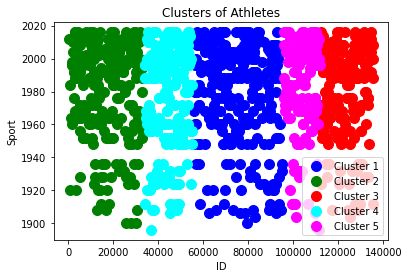

In [ ]:
#visulaizing the clusters based on id of the athletes corresponding to the sport
plt.scatter(x[y_pred == 0, 0], x[y_pred == 0, 1], s = 100, c = 'blue', label = 'Cluster 1')  
plt.scatter(x[y_pred == 1, 0], x[y_pred == 1, 1], s = 100, c = 'green', label = 'Cluster 2')  
plt.scatter(x[y_pred== 2, 0], x[y_pred == 2, 1], s = 100, c = 'red', label = 'Cluster 3')  
plt.scatter(x[y_pred == 3, 0], x[y_pred == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')  
plt.scatter(x[y_pred == 4, 0], x[y_pred == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5')  
plt.title('Clusters of Athletes')  
plt.xlabel('ID')  
plt.ylabel('Sport')  
plt.legend()  
plt.show()  

Merits An Demerits:
Agglomerative is a bottom-up approach, in which the algorithm starts with taking all data points as single clusters and merging them until one cluster is left.
We need not enter the cluster values every single time. It does not work very well on vast amounts of data or huge datasets.